# Проект №3 - Определение перспективного тарифа для телеком компании

### Цель проекта:

   Провести анализ и сравнение двух тарифов компании «Мегалайн», на выборке из 500 клиентов.
   
   Выяснить, какой тариф лучше. 

### Содержание проекта:

1) Открытие данных и первый осмотр 
    
   а) Открыть все четыре дата сета
    
   б) Провести осмотр методами: "info" "head" и "describe"
    
   в) Вывод

2) Предобработка данных 

   а) Превести данные к нужным типам 
    
   б) Найдите и исправьте ошибки в данных
    
   в) Пояснить, какие ошибки были найдены и как исправлены 
    
   г) Посчитать: количество сделанных звонков и израсходованных минут разговора по месяцам
    
   д) Посчитать: количество отправленных сообщений по месяцам
    
   е) Посчитать: объем израсходованного интернет-трафика по месяцам
    
   ж) Посчитать: помесячную выручку с каждого пользователя 
    
   в) Вывод

3) Анализ данных
    
   а) Описание поведение клиентов оператора
    
   б) Среднее количество, дисперсию и стандартное отклонение
    
   в) Построение гистограм
    
   г) Описание распределения
    
   д) Вывод

4) Проверка гипотез

   а) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
    
   б) Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    
   в) Пояснить: как формулировались нулевая и альтернативная гипотезы
    
   г) Пояснить: какой критерий использовался для проверки гипотез и почему
    
   д) Вывод

5) Общий вывод



## Шаг 1. Открытие данных и первый осмотр

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import numpy as np
from scipy import stats as st
import copy

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

### Начнем с датасета users

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users.head(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


###  Датасет calls

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


###  Датасет messages

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


###  Датасет internet

In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


###  Датасет tariffs

In [11]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод:

    1) users - неверный тип данны у времени
    
    2) calls - неверный тип данны у времени, значения звонков нужно округлить, добавить столбец месяц

    3) messages - неверный тип данны у времени, добавим столбец месяца
    
    4) internet - неверный тип данны у времени округлим ко-во использованных мегабайт, добавим столбец месяца
    


## Шаг 2. Предобработка данных

### Переработка calls

В столбце duration заменим нулевые значения на единицу, и округлим другие значения так как тарификация по минутная 

In [12]:
calls['duration'] = calls['duration'].replace(0, 1)
calls['duration'] = calls['duration'].apply(np.ceil).replace(0, 1)
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1.0,1000
1,1000_1,2018-08-17,1.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


Переведём тип данных столбца call_date в datetime и добавим столбец месяца

In [13]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month
calls.head(10)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1.0,1000,7
1,1000_1,2018-08-17,1.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,1.0,1000,11
6,1000_6,2018-10-18,1.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,1.0,1000,8


### Переработка users

Исправляем тип данных в *churn_date* и *reg_date*

In [14]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')

Пропущенные значения в churn_date означают, что на момент выборки клиент был активен, предположи что так и осталось хотя бы до 01.01.2019, чтобы не иметь дело с NaN

In [15]:
users['churn_date'].fillna('2019-01-01', inplace=True) 
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2019-01-01,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Переименуем столбец tariff_name, чтобы различать его и не перепутать с самой таблицей

In [16]:
users.set_axis(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff_name'], axis = 'columns', inplace = True)

### Переработка messages

Переведём данные столбца в тип datetime

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

Добавим столбец месяца

In [18]:
messages['month'] = messages['message_date'].dt.month

### Переработка internet

Переведём данные столбца в тип datetime

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

Добавим столбец месяца

In [20]:
internet['month'] = internet['session_date'].dt.month

In [21]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil).replace(0, 1)

### Вывод:

   Мы предобработали данные и подготовили их к анализу и вычислениям:
   
   1) Добавили столбец с номером месяца
   
   2) Округлили данные и избавились от нулевых значений и пропусков
   
   3) Изменили формат типа данных на нужный
   
   

## Начнем формировать одну большую таблицу total_data

### Объединим  tariffs и users

In [22]:
user_tariff = tariffs
for row in [users]:
    user_tariff = user_tariff.merge(row, on = ['tariff_name'], how = 'left')
    
user_tariff.sample(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,first_name,last_name,reg_date
292,50,15360,500,550,200,3,3,smart,1419,19,2019-01-01,Новороссийск,Эльмира,Яшина,2018-07-19
478,1000,30720,3000,1950,150,1,1,ultra,1424,27,2019-01-01,Москва,Розалия,Ёрохова,2018-06-20
341,50,15360,500,550,200,3,3,smart,1487,72,2019-01-01,Кострома,Рудольф,Кириллов,2018-08-13
132,50,15360,500,550,200,3,3,smart,1179,43,2019-01-01,Вологда,Дана,Астапенко,2018-04-19
466,1000,30720,3000,1950,150,1,1,ultra,1385,26,2019-01-01,Москва,Алиса,Дубинина,2018-01-13
89,50,15360,500,550,200,3,3,smart,1123,74,2019-01-01,Краснодар,Вениамин,Устинов,2018-03-18
15,50,15360,500,550,200,3,3,smart,1023,42,2019-01-01,Томск,Людмила,Мельникова,2018-10-22
202,50,15360,500,550,200,3,3,smart,1278,46,2019-01-01,Новокузнецк,Леонид,Троицкий,2018-12-23
489,1000,30720,3000,1950,150,1,1,ultra,1466,37,2019-01-01,Новосибирск,Рубен,Шевцов,2018-02-28
408,1000,30720,3000,1950,150,1,1,ultra,1225,71,2019-01-01,Оренбург,Даниэла,Горбачева,2018-04-26


### Сохраним пользователей разных тарифов в разных таблицах

In [23]:
data_smart = user_tariff.query('tariff_name == "smart"')
data_ultra = user_tariff.query('tariff_name == "ultra"')

In [24]:
print('Количество пользователей тарифа Smart:', len(data_smart))
print('Количество пользователей тарифа Ultra:', len(data_ultra))

Количество пользователей тарифа Smart: 351
Количество пользователей тарифа Ultra: 149


### Объединим user_tariff и calls

In [25]:
user_call = user_tariff
for row in [calls]:
    user_call = user_call.merge(row, on = ['user_id'], how = 'left')
    
user_call.sample(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,user_id,age,churn_date,city,first_name,last_name,reg_date,id,call_date,duration,month
136872,1000,30720,3000,1950,150,1,1,ultra,1057,43,2019-01-01,Москва,Динара,Дьячкова,2018-03-12,1057_90,2018-08-19,1.0,8.0
174071,1000,30720,3000,1950,150,1,1,ultra,1346,69,2019-01-01,Саратов,Адам,Антропов,2018-07-03,1346_415,2018-12-30,1.0,12.0
73410,50,15360,500,550,200,3,3,smart,1274,53,2019-01-01,Волгоград,Аксён,Еремин,2018-05-03,1274_73,2018-12-05,11.0,12.0
120418,50,15360,500,550,200,3,3,smart,1464,44,2019-01-01,Саранск,Антонина,Авросинова,2018-02-17,1464_325,2018-10-23,8.0,10.0
40535,50,15360,500,550,200,3,3,smart,1147,63,2019-01-01,Якутск,Владимир,Синицын,2018-07-09,1147_26,2018-12-23,1.0,12.0
169435,1000,30720,3000,1950,150,1,1,ultra,1330,65,2019-01-01,Нижний Новгород,Изольда,Алфимова,2018-02-02,1330_580,2018-04-07,5.0,4.0
116583,50,15360,500,550,200,3,3,smart,1451,58,2019-01-01,Набережные Челны,Виктория,Завьялова,2018-08-27,1451_181,2018-10-18,1.0,10.0
22489,50,15360,500,550,200,3,3,smart,1079,20,2019-01-01,Москва,Еремей,Авроров,2018-05-15,1079_528,2018-09-02,6.0,9.0
145690,1000,30720,3000,1950,150,1,1,ultra,1120,25,2019-01-01,Краснодар,Агнесса,Абдулина,2018-01-24,1120_242,2018-12-02,9.0,12.0
71335,50,15360,500,550,200,3,3,smart,1263,32,2019-01-01,Балашиха,Ермолай,Зайцев,2018-04-30,1263_519,2018-09-01,1.0,9.0


### Сохраним сводную таблицу пользователей с количеством звонков и суммой минут помесячно

In [26]:
user_call_sum = user_call.pivot_table(index = ['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
user_call_sum.sample(10)

,,count,sum
,,duration,duration
user_id,month,,
1358,2.0,19,135.0
1446,12.0,54,433.0
1404,7.0,27,150.0
1430,6.0,37,240.0
1425,6.0,96,688.0
1221,12.0,34,229.0
1459,12.0,72,500.0
1228,8.0,62,494.0


 ### Объеденим таблицу user_call_sum и user_call

In [27]:
table_user_call = user_call_sum
for row in [user_call]:
    table_user_call = table_user_call.merge(row, on = ['user_id', 'month'], how = 'left')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [28]:
table_user_call.sample(10)

,user_id,month,"(count, duration)","(sum, duration)",messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,...,tariff_name,age,churn_date,city,first_name,last_name,reg_date,id,call_date,duration
86251,1217,4.0,67,474.0,50,15360,500,550,200,3,...,smart,42,2019-01-01,Ульяновск,Ермолай,Сазонов,2018-02-23,1217_374,2018-04-19,1.0
136618,1348,11.0,81,537.0,1000,30720,3000,1950,150,1,...,ultra,55,2019-01-01,Москва,Вероника,Громова,2018-10-07,1348_74,2018-11-03,1.0
48391,1121,5.0,54,303.0,50,15360,500,550,200,3,...,smart,62,2019-01-01,Белгород,Марта,Афанасова,2018-05-04,1121_456,2018-05-16,10.0
105593,1272,10.0,43,315.0,1000,30720,3000,1950,150,1,...,ultra,61,2019-01-01,Пенза,Мстислав,Демьянов,2018-08-29,1272_107,2018-10-27,3.0
10748,1028,10.0,138,985.0,1000,30720,3000,1950,150,1,...,ultra,20,2019-01-01,Тверь,Рустем,Евсеев,2018-10-02,1028_146,2018-10-21,5.0
140982,1358,12.0,79,627.0,50,15360,500,550,200,3,...,smart,64,2019-01-01,Ставрополь,Демьян,Логинов,2018-02-21,1358_201,2018-12-29,7.0
104056,1267,8.0,69,543.0,50,15360,500,550,200,3,...,smart,63,2019-01-01,Екатеринбург,Яна,Седова,2018-08-05,1267_274,2018-08-24,1.0
1980,1005,9.0,66,488.0,50,15360,500,550,200,3,...,smart,67,2019-01-01,Набережные Челны,Афанасий,Горлов,2018-01-25,1005_168,2018-09-01,8.0
95360,1243,6.0,68,495.0,1000,30720,3000,1950,150,1,...,ultra,74,2019-01-01,Пермь,Артём,Леонтьев,2018-06-01,1243_43,2018-06-21,9.0
28130,1070,8.0,32,196.0,50,15360,500,550,200,3,...,smart,20,2019-01-01,Химки,Эльза,Селиванова,2018-08-07,1070_44,2018-08-19,3.0


### Сохраняем сводную таблицу с данными о тарифах и статистике звонков в pivot_call

In [29]:
pivot_call = table_user_call.pivot_table(index = ['user_id', 'age', 'city', 'month', 'tariff_name', 'rub_monthly_fee', 
                                                  'minutes_included', 'messages_included', 'rub_per_message', 'rub_per_gb', 
                                                  'rub_per_minute', 'mb_per_month_included'], 
                                         
                                         values = ['duration'], aggfunc=['count', 'sum'])

In [30]:
pivot_call

count  \
                                                                                                                                                             duration   
user_id age city        month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included            
1000    52  Краснодар   5.0   ultra       1950            3000             1000              1               150        1              30720                       22   
                        6.0   ultra       1950            3000             1000              1               150        1              30720                       43   
                        7.0   ultra       1950            3000             1000              1               150        1              30720                       47   
                        8.0   ultra       1950            3000             1000              1               150        1              30720                       52   
                        9.0   ultra       1950            3000             1000              1               150        1              30720                       58   
...                                                                                                                                                               ...   
1498    68  Владикавказ 10.0  smart       550             500              50                3               200        3              15360                       41   
1499    35  Пермь       9.0   smart       550             500              50                3               200        3              15360                        9   
                        10.0  smart       550             500              50                3               200        3              15360                       68   
                        11.0  smart       550             500              50                3               200        3              15360                       74   
                        12.0  smart       550             500              50                3               200        3              15360                       69   

                                                                                                                                                                  sum  
                                                                                                                                                             duration  
user_id age city        month tariff_name rub_monthly_fee minutes_included messages_included rub_per_message rub_per_gb rub_per_minute mb_per_month_included           
1000    52  Краснодар   5.0   ultra       1950            3000             1000              1               150        1              30720                    164.0  
                        6.0   ultra       1950            3000             1000              1               150        1              30720                    187.0  
                        7.0   ultra       1950            3000             1000              1               150        1              30720                    346.0  
                        8.0   ultra       1950            3000             1000              1               150        1              30720                    418.0  
                        9.0   ultra       1950            3000             1000              1               150        1              30720                    478.0  
...                                                                                                                                                               ...  
1498    68  Владикавказ 10.0  smart       550             500              50                3               200        3              15360                    258.0  
1499    35  Пермь       9.0   smart       550             500              50                3               200 

### Объеденим user_tariff и messages

In [31]:
user_messages = user_tariff
for row in [messages]:
    user_messages = user_messages.merge(row, on = ['user_id'], how = 'left')

### Сохраним сводную таблицу с данными о тарифах и статистике сообщений в user_messages_sum

In [32]:
user_messages_sum = user_messages.pivot_table(index = ['user_id', 'month'], values='id', aggfunc=['count'])
user_messages_sum.sample(10)

,,count
,,id
user_id,month,
1498,10.0,42
1440,10.0,108
1171,11.0,78
1146,5.0,22
1432,10.0,79
1365,12.0,43
1271,7.0,78
1007,11.0,21


### Соединим pivot_call и user_messages_sum, сохраним в одной таблице total_data

In [33]:
pivot_call_user_messages_sum = pivot_call.join(user_messages_sum)
pivot_call_user_messages_sum

count  \
                                                                                                                                                             duration   
user_id month age messages_included rub_per_message mb_per_month_included tariff_name rub_per_gb minutes_included rub_per_minute rub_monthly_fee city                   
1000    5.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар         22   
        6.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар         43   
        7.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар         47   
        8.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар         52   
        9.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар         58   
...                                                                                                                                                               ...   
1498    10.0  68  50                3               15360                 smart       200        500              3              550             Владикавказ       41   
1499    9.0   35  50                3               15360                 smart       200        500              3              550             Пермь              9   
        10.0  35  50                3               15360                 smart       200        500              3              550             Пермь             68   
        11.0  35  50                3               15360                 smart       200        500              3              550             Пермь             74   
        12.0  35  50                3               15360                 smart       200        500              3              550             Пермь             69   

                                                                                                                                                                  sum  \
                                                                                                                                                             duration   
user_id month age messages_included rub_per_message mb_per_month_included tariff_name rub_per_gb minutes_included rub_per_minute rub_monthly_fee city                   
1000    5.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар      164.0   
        6.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар      187.0   
        7.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар      346.0   
        8.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар      418.0   
        9.0   52  1000              1               30720                 ultra       150        3000             1              1950            Краснодар      478.0   
...                                                                                                                                                               ...   
1498    10.0  68  50                3               15360                 smart       200        500              3              550             Владикавказ    258.0   
1499    9.0   35  50                3               15360                 smart       200        500   

### Объеденим user_tariff и internet

In [34]:
mb_used = user_tariff
for df in [internet]:
    mb_used = mb_used.merge(df, on = ['user_id'], how = 'left')

### Сохраним сводную таблицу с данными о тарифах и статистике затрат интернета в mb_used_sum

In [35]:
mb_used_sum = mb_used.pivot_table(index = ['user_id', 'month'], values='mb_used', aggfunc=['sum'])
mb_used_sum.sample(10)

,,sum
,,mb_used
user_id,month,
1110,6.0,24890.0
1373,3.0,22662.0
1360,9.0,12245.0
1428,11.0,17658.0
1018,11.0,4698.0
1421,7.0,21272.0
1027,5.0,24917.0
1098,8.0,31019.0


### Соединим pivot_call_user_messages_sum и mb_used_sum, сохраним в total_data

In [36]:
total_data = pivot_call_user_messages_sum.join(mb_used_sum)
total_data

count  \
                                                                                                                                                             duration   
user_id month city        messages_included rub_per_message mb_per_month_included tariff_name rub_per_gb minutes_included rub_per_minute rub_monthly_fee age            
1000    5.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52        22   
        6.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52        43   
        7.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52        47   
        8.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52        52   
        9.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52        58   
...                                                                                                                                                               ...   
1498    10.0  Владикавказ 50                3               15360                 smart       200        500              3              550             68        41   
1499    9.0   Пермь       50                3               15360                 smart       200        500              3              550             35         9   
        10.0  Пермь       50                3               15360                 smart       200        500              3              550             35        68   
        11.0  Пермь       50                3               15360                 smart       200        500              3              550             35        74   
        12.0  Пермь       50                3               15360                 smart       200        500              3              550             35        69   

                                                                                                                                                                  sum  \
                                                                                                                                                             duration   
user_id month city        messages_included rub_per_message mb_per_month_included tariff_name rub_per_gb minutes_included rub_per_minute rub_monthly_fee age            
1000    5.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52     164.0   
        6.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52     187.0   
        7.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52     346.0   
        8.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52     418.0   
        9.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52     478.0   
...                                                                                                                                                               ...   
1498    10.0  Владикавказ 50                3               15360                 smart       200        500              3              550             68     258.0   
1499    9.0   Пермь       50                3               15360                 smart       200      

In [37]:
total_data.columns = ['duration_count', 'duration_count_sum', 'messages', 'mb_used']
total_data

duration_count  \
user_id month city        messages_included rub_per_message mb_per_month_included tariff_name rub_per_gb minutes_included rub_per_minute rub_monthly_fee age                   
1000    5.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52               22   
        6.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52               43   
        7.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52               47   
        8.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52               52   
        9.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52               58   
...                                                                                                                                                                      ...   
1498    10.0  Владикавказ 50                3               15360                 smart       200        500              3              550             68               41   
1499    9.0   Пермь       50                3               15360                 smart       200        500              3              550             35                9   
        10.0  Пермь       50                3               15360                 smart       200        500              3              550             35               68   
        11.0  Пермь       50                3               15360                 smart       200        500              3              550             35               74   
        12.0  Пермь       50                3               15360                 smart       200        500              3              550             35               69   

                                                                                                                                                              duration_count_sum  \
user_id month city        messages_included rub_per_message mb_per_month_included tariff_name rub_per_gb minutes_included rub_per_minute rub_monthly_fee age                       
1000    5.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52                164.0   
        6.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52                187.0   
        7.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52                346.0   
        8.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52                418.0   
        9.0   Краснодар   1000              1               30720                 ultra       150        3000             1              1950            52                478.0   
...                                                                                                                                                                          ...   
1498    10.0  Владикавказ 50                3               15360                 smart       200        500              3              550             68                258.0   
1499    9.0   Пермь       50                3               15360                 smart       200        500              3              550             35                 71.0   
        10.0  Пермь       50                3               15360    

Проверим на пропуски

In [38]:
total_data.isna().sum()

duration_count          0
duration_count_sum      0
messages              496
mb_used                11
dtype: int64

Возможно люди просто не пользовались сообщениями и/или интернетом, заменим пустые значения на 0

In [39]:
total_data = total_data.fillna(0)
total_data.isna().sum()

duration_count        0
duration_count_sum    0
messages              0
mb_used               0
dtype: int64

In [40]:
total_data.reset_index(inplace=True)
total_data

,user_id,month,city,messages_included,rub_per_message,mb_per_month_included,tariff_name,rub_per_gb,minutes_included,rub_per_minute,rub_monthly_fee,age,duration_count,duration_count_sum,messages,mb_used
0,1000,5.0,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,22,164.0,22.0,2257.0
1,1000,6.0,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,43,187.0,60.0,23262.0
2,1000,7.0,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,47,346.0,75.0,14017.0
3,1000,8.0,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,52,418.0,81.0,14072.0
4,1000,9.0,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,58,478.0,57.0,14583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,10.0,Владикавказ,50,3,15360,smart,200,500,3,550,68,41,258.0,42.0,20614.0
3170,1499,9.0,Пермь,50,3,15360,smart,200,500,3,550,35,9,71.0,11.0,1849.0
3171,1499,10.0,Пермь,50,3,15360,smart,200,500,3,550,35,68,473.0,48.0,17824.0
3172,1499,11.0,Пермь,50,3,15360,smart,200,500,3,550,35,74,624.0,59.0,17994.0


## Посчитаем:

#### (бесплатны лимит - потраченный) * цену единицы = прибыдь сверх тарифа и добавим соответствующие столбцы

In [41]:
total_data['calls_income'] = ((total_data['duration_count_sum'] - total_data['minutes_included']) * total_data['rub_per_minute'])
total_data['messages_income'] = ((total_data['messages'] - total_data['messages_included']) * total_data['rub_per_message'])
total_data['gb_income'] = ((total_data['mb_used'] - total_data['mb_per_month_included']) * total_data['rub_per_gb']/1024)
total_data.sample(10)

,user_id,month,city,messages_included,rub_per_message,mb_per_month_included,tariff_name,rub_per_gb,minutes_included,rub_per_minute,rub_monthly_fee,age,duration_count,duration_count_sum,messages,mb_used,calls_income,messages_income,gb_income
1561,1250,7.0,Смоленск,50,3,15360,smart,200,500,3,550,20,70,498.0,38.0,12953.0,-6.0,-36.0,-470.117188
524,1083,8.0,Сочи,50,3,15360,smart,200,500,3,550,24,65,513.0,45.0,18560.0,39.0,-15.0,625.000000
1614,1260,7.0,Москва,50,3,15360,smart,200,500,3,550,56,49,273.0,0.0,8427.0,-681.0,-150.0,-1354.101562
1783,1285,4.0,Краснодар,50,3,15360,smart,200,500,3,550,44,46,332.0,105.0,6456.0,-504.0,165.0,-1739.062500
114,1015,10.0,Челябинск,50,3,15360,smart,200,500,3,550,26,67,587.0,68.0,16698.0,261.0,54.0,261.328125
1867,1298,12.0,Новосибирск,50,3,15360,smart,200,500,3,550,29,89,650.0,38.0,25913.0,450.0,-36.0,2061.132812
275,1045,1.0,Улан-Удэ,50,3,15360,smart,200,500,3,550,48,1,9.0,5.0,2348.0,-1473.0,-135.0,-2541.406250
1708,1274,8.0,Волгоград,50,3,15360,smart,200,500,3,550,53,90,723.0,75.0,14979.0,669.0,75.0,-74.414062
1613,1259,12.0,Санкт-Петербург,1000,1,30720,ultra,150,3000,1,1950,33,106,848.0,171.0,12151.0,-2152.0,-829.0,-2720.068359
2374,1378,6.0,Иркутск,50,3,15360,smart,200,500,3,550,21,71,502.0,17.0,13556.0,6.0,-99.0,-352.343750


Заменяем отрицательные значения но 0, чтобы верно подсчитать доход

In [42]:
total_data['messages_income'] = total_data['messages_income'].clip(lower = 0)
total_data['calls_income'] = total_data['calls_income'].clip(lower = 0)
total_data['gb_income'] = total_data['gb_income'].clip(lower = 0)

In [43]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 19 columns):
user_id                  3174 non-null int64
month                    3174 non-null float64
city                     3174 non-null object
messages_included        3174 non-null int64
rub_per_message          3174 non-null int64
mb_per_month_included    3174 non-null int64
tariff_name              3174 non-null object
rub_per_gb               3174 non-null int64
minutes_included         3174 non-null int64
rub_per_minute           3174 non-null int64
rub_monthly_fee          3174 non-null int64
age                      3174 non-null int64
duration_count           3174 non-null int64
duration_count_sum       3174 non-null float64
messages                 3174 non-null float64
mb_used                  3174 non-null float64
calls_income             3174 non-null float64
messages_income          3174 non-null float64
gb_income                3174 non-null float64
dtypes: float64(7), in

Переведем нужны столбцы в int

In [1]:
total_data['calls_income'] = total_data['calls_income'].astype('int')
total_data['messages_income'] = total_data['messages_income'].astype('int')
total_data['messages'] = total_data['messages'].astype('int')
total_data['gb_income'] = total_data['gb_income'].astype('int')
total_data['month'] = total_data['month'].astype('int')

NameError: name 'total_data' is not defined

In [45]:
total_data.head(15)

,user_id,month,city,messages_included,rub_per_message,mb_per_month_included,tariff_name,rub_per_gb,minutes_included,rub_per_minute,rub_monthly_fee,age,duration_count,duration_count_sum,messages,mb_used,calls_income,messages_income,gb_income
0,1000,5,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,22,164.0,22,2257.0,0,0,0
1,1000,6,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,43,187.0,60,23262.0,0,0,0
2,1000,7,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,47,346.0,75,14017.0,0,0,0
3,1000,8,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,52,418.0,81,14072.0,0,0,0
4,1000,9,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,58,478.0,57,14583.0,0,0,0
5,1000,10,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,57,363.0,73,14717.0,0,0,0
6,1000,11,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,43,344.0,58,14769.0,0,0,0
7,1000,12,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,46,341.0,70,9829.0,0,0,0
8,1001,11,Москва,50,3,15360,smart,200,500,3,550,41,59,444.0,0,18460.0,0,0,605
9,1001,12,Москва,50,3,15360,smart,200,500,3,550,41,63,430.0,0,14059.0,0,0,0


In [46]:
total_data['income'] = (total_data['rub_monthly_fee'] + total_data['calls_income'] 
                        + total_data['messages_income'] + total_data['gb_income'])

In [47]:
total_data.head(15)

,user_id,month,city,messages_included,rub_per_message,mb_per_month_included,tariff_name,rub_per_gb,minutes_included,rub_per_minute,rub_monthly_fee,age,duration_count,duration_count_sum,messages,mb_used,calls_income,messages_income,gb_income,income
0,1000,5,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,22,164.0,22,2257.0,0,0,0,1950
1,1000,6,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,43,187.0,60,23262.0,0,0,0,1950
2,1000,7,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,47,346.0,75,14017.0,0,0,0,1950
3,1000,8,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,52,418.0,81,14072.0,0,0,0,1950
4,1000,9,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,58,478.0,57,14583.0,0,0,0,1950
5,1000,10,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,57,363.0,73,14717.0,0,0,0,1950
6,1000,11,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,43,344.0,58,14769.0,0,0,0,1950
7,1000,12,Краснодар,1000,1,30720,ultra,150,3000,1,1950,52,46,341.0,70,9829.0,0,0,0,1950
8,1001,11,Москва,50,3,15360,smart,200,500,3,550,41,59,444.0,0,18460.0,0,0,605,1155
9,1001,12,Москва,50,3,15360,smart,200,500,3,550,41,63,430.0,0,14059.0,0,0,0,550


Сохраним в total_income общую прибыль и общую стоимость

In [48]:
total_income = total_data.pivot_table(index = ['tariff_name'], 
                values = ['calls_income', 'messages_income', 'gb_income', 'income'], aggfunc=['sum'])

total_income

sum                                   
            calls_income gb_income   income messages_income
tariff_name                                                
smart             316056   1205941  2783431           38784
ultra                  0    106002  1960452               0

### Вывод:

1) Больше всего приносит дополнительного дохода тариф Smart.

2)Самым прибильным сегментом является - интернет, при том в двух тарифах.

3)Общая прибыль больше всего у тарифа Smart.

### Cохраним общую прибыль с каждого тарифа в smart_sum и ultra_sum соответственно

In [49]:
smart_sum = total_data[(total_data['tariff_name'] == 'smart')]
ultra_sum = total_data[(total_data['tariff_name'] == 'ultra')]

### Построим гистограммы

#### Тариф smart

Гистограмма с количеством минут

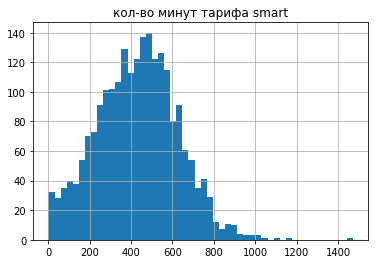

In [50]:
smart_sum['duration_count_sum'].hist(bins=50)
plt.title('кол-во минут тарифа smart')
plt.show()

Наблюдаем нормальное распределение


Большинство пользователей тратят как раз до лимита, то есть 250 - 500 минут, сравнительно небольшая часть пользователей тратит 500 - 700 мину и есть редкие случаи когда использованно было больше 1000 минут!

Гистограмма с колличеством сообщений

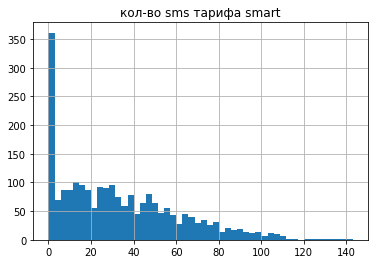

In [51]:
smart_sum['messages'].hist(bins=50)
plt.title('кол-во sms тарифа smart')
plt.show()

Наблюдаем распределение Пуассона

Явное большинсто вообще непользуется sms (оно и логично), однако около 30% клиентов пользуются сообщениями, а совсем небольшой процент даже превышает лимит в 50 сообщений

Гистограмма с колличеством интернет трафика

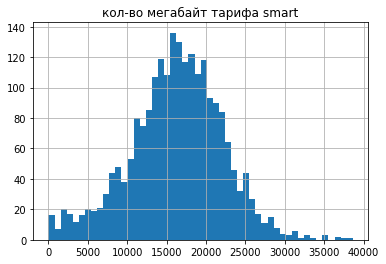

In [52]:
smart_sum['mb_used'].hist(bins=50)
plt.title('кол-во мегабайт тарифа smart')
plt.show()

Наблюдаем нормальное распределение

БОльшая часть людей тратит как раз в пределах 15гб входя в лимит

Есть небольшая часть людейкотрая вообще не пользуется интернетом (возможно они и пишут sms)

И присутствует очень большое количество клиенто котрые тратя сверх лимита вплоть до увелечения трафика в 2 раза (а то и больше)

#### Тариф ultra

Гистограмма с количеством минут

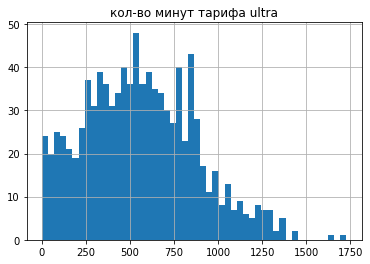

In [53]:
ultra_sum['duration_count_sum'].hist(bins=50,)
plt.title('кол-во минут тарифа ultra')
plt.show()

Наблюдаем нормальное распределение

Небольшая часть пользователей не пользуются сотовой связью, либо же используют не больше 250 минут.

Пик количества минут находится около 500 минут 

После 800 минут идёт резкий спад

Гистограмма с колличеством сообщений

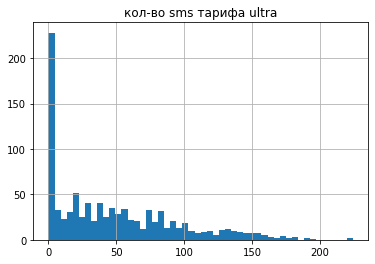

In [54]:
ultra_sum['messages'].hist(bins=50,)
plt.title('кол-во sms тарифа ultra')
plt.show()

Наблюдаем распределение Пуассона

Так же как и с тарифом smart, почти никто не отправляет сообщения, а та часть которая отправляет не переходит лимата в 1000 сообщений

Гистограмма с колличеством интернет трафика

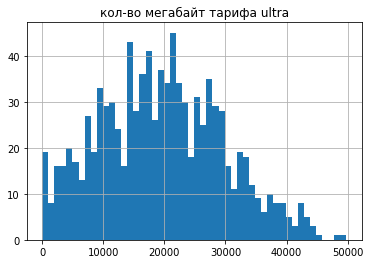

In [55]:
ultra_sum['mb_used'].hist(bins=50,)
plt.title('кол-во мегабайт тарифа ultra')
plt.show()

Наблюдаем нормальное распределение

Пик приходится примерно на 21.5 гб 

Так же есть резкие скачки на 9-10 гб и 25-30гб

Совсем небольше колсичтво пользователей используют болше 40гб или непользуются интернетом совсем

### Посчитаем среднее количество, дисперсию и стандартное отклонение по каждому тарифу

In [56]:
total_data_var = total_data.pivot_table(index = ['tariff_name'], 
                    values = ['duration_count_sum', 'messages', 'mb_used'], aggfunc=['mean', 'var', 'std'])
total_data_var

mean                                         var  \
            duration_count_sum       mb_used   messages duration_count_sum   
tariff_name                                                                  
smart               430.609987  16238.160144  33.396311       37577.967083   
ultra               560.113565  19482.347003  49.033649       99062.633405   

                                                      std                \
                  mb_used     messages duration_count_sum       mb_used   
tariff_name                                                               
smart        3.464007e+07   798.595792         193.850373   5885.581942   
ultra        1.027540e+08  2198.733603         314.742170  10136.764424   

                        
              messages  
tariff_name             
smart        28.259437  
ultra        46.890656

In [57]:
print(smart_sum['income'].describe())
print()
print('Общий доход от тарифа smart:', smart_sum['income'].sum())

count    2223.000000
mean     1252.105713
std       798.268604
min       550.000000
25%       553.000000
50%       988.000000
75%      1705.000000
max      6768.000000
Name: income, dtype: float64

Общий доход от тарифа smart: 2783431


In [58]:
print(ultra_sum['income'].describe())
print()
print('Общий доход от тарифа ultra:', ultra_sum['income'].sum())

count     951.000000
mean     2061.463722
std       359.443307
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4743.000000
Name: income, dtype: float64

Общий доход от тарифа ultra: 1960452


### Вывод:

    1) Пользователи тарифа smart, часто превышают лимиты, особенно по звонкам и интернету
    
    2) Пользователи тарифа ultra почти не превышают лимиты, заисключением интеренета, где всё-таки прослеживается 
        тенденция к экстра трафику 
        
    3) Пользователи тарифа ultra всреднем тратя больше интерента, но не намного всего на 3-4 гб
    
    4) На обоих тарифах пользователи почти не используют сообщения
    
    5) Тариф smart приносит больше дохода чем тариф ultra на 700 т.р. в месяц больше, не смотря на то что при тарифе ultra пользователь тратит в среднем почти в 2 раза больше денег 
    

# Проверка гипотез:
    
   ## Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

H0 = средние наших выборок равны

H1 = Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Использую метод scipy.stats.ttest_ind (smart, ultra, equal_var = False). False, потому что дисперсии наших выборок отличаются.

Критический уровень значимости зададим = 0.05

In [59]:
smart = smart_sum['income']
ultra = ultra_sum['income']

print('cреднее Smart: ',pd.Series(smart).mean())
print('cреднее Ultra: ',pd.Series(ultra).mean())

alpha = 0.05

results = st.ttest_ind(smart, ultra, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

cреднее Smart:  1252.10571300045
cреднее Ultra:  2061.4637223974764
p-значение: 2.4918929145928965e-276
Отвергаем нулевую гипотезу


Крайне низкое значение p-value говорит нам о том, что вероятность случайного совпадения средних наших выборок крайне низкое

следовательно нулевая гипотеза отвергается!

А следовательно наша вторая гипотиза о том что 

"Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" - не отвергается!  

## Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Составим гипотезы

H0 - Сердняя выручка по Москве и регионам не отличается

H1 - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


Для проверки гипотезы нам нужно:

1) Составить 2 таблицы по Москве и регионам (msc и not_msc соответственно)

2) Выяснить нормальное ли в них распределение с помощью тасте Шапира-Уилка (st.shapiro())

3) При ненормальном распределении провести тест Левена, дабы сравнить дисперсии

4) С помощью t-теста Стьюдента проверить нашу гипотезу

(0.8960785269737244, 6.836549535053033e-20)

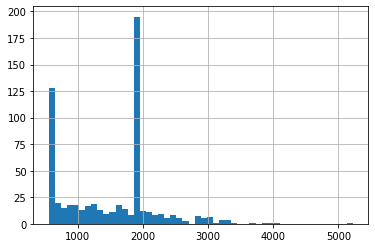

In [60]:
msc = total_data[(total_data['city'] == 'Москва')]
not_msc = total_data[(total_data['city'] != 'Москва')]

msc = msc['income']
not_msc = not_msc['income']

msc.hist(bins=50)
st.shapiro(msc)

(0.8893547654151917, 1.7429294247333502e-39)

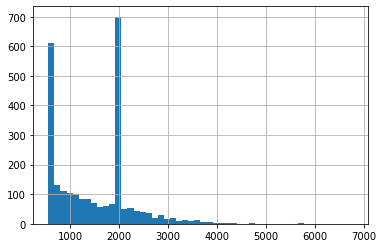

In [61]:
not_msc.hist(bins=50)
st.shapiro(not_msc)

Распределение - ненормально, следовательно применям тест Левена для сравнения дисперсий

In [62]:
region_disp = st.levene(msc, not_msc, center='mean')

region_disp

LeveneResult(statistic=4.0259300689721975, pvalue=0.04489063969220699)

Равенство дисперсий не соблюдается, следовательно при использовании метода st.ttest_ind, аргумент equal_var будет равн = False

In [63]:
alpha = 0.05
results = st.ttest_ind(msc, not_msc, equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.41761557644608627
Не получилось отвергнуть нулевую гипотезу


p-value = 0.41, следовательно есть большая вероятность того, что отличие средних значений наших выборок случайно и мы не можем отвергнуть нулевую гипотезу, которая говорит нам о равенстве средних значений

Гипотезу о различии средних мы отвергаем!

Проверим по тарифам  (удалено)

### Вывод:

Даже проверив отдельно по тарифам, зная среднюю выручку, мы можем сказать, что выручка по регионам отличается несущественно

# Общий вывод

1) Тариф smart является самым прибыльным и в плане общего и вплане доп. доходов

2) Тариф smart является самым популярным

3) Пользователи тарифа smart часто переходят лимиты, особенно по звонкам и интеренту

4) Пользователи тарифа ultra почти не привышают лимиты, кроме интеренета, а по звонка и сообщения даже не доходят до лимита

5) Пусть общий и доп. доход выше у тарифа smart, но средняя выручка выше у тарифа ultra

6) Самый прибыльная часть в обоих тарифах - интеренет

7) В среднем объем использованного интерента в обоих тарифах не сильно различается (smart - 16гб, ultra - 19гб)

8) БОльшая часть пользователей не используют сообщения, либо исполбзуют по минимуму

9) Разница в выручке в Москве и других регионах - несущественна 

# Главный вывод:

Входе проекта, мы проанализировали данные, посчитали прибыльность тарифов и их стоймости за месяц, а так же проверили гипотезы.

Мы узнали, что средние израсходованные количество звонков, сообщений и трафика не так сильно отличаются между тарифами, тогда как базовая стоимость тарифов отличается почти в 4 раза!

Соответственно наш вывод: тариф ULTRA выгоднее для телекомпании, чем тариф SMART